<a href="https://colab.research.google.com/github/Learnheart/Traffic-sign/blob/main/AI_trafic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Preparation**

In [ ]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout



**link dataset**: https://drive.google.com/drive/folders/1MorkYz8NQKPZ7-eWYlBlZcTl1bb-4XVY


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/AI/Meta'
train_path = '/content/drive/MyDrive/AI/Train'
test_path = '/content/drive/MyDrive/AI/Test'
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('/content/drive/MyDrive/AI/Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)0
labels = np.array(labels)

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
print('Total trainable classes: ',NUM_CATEGORIES)

Total trainable classes:  43


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31463, 30, 30, 3) (7866, 30, 30, 3) (31463,) (7866,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/AI/Train.csv', usecols=['ClassId', 'Path', 'Width', 'Height'])

test_data = pd.read_csv('/content/drive/MyDrive/AI/Test.csv', usecols=['ClassId', 'Path', 'Width', 'Height'])

train_data.rename({'ClassId': 'label', 'Path': 'path'}, inplace=True, axis=1)

test_data.rename({'ClassId': 'label', 'Path': 'path'}, inplace=True, axis=1)

# Display the first few rows of the modified training dataset to inspect the changes.
train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [ ]:
y_train.shape, y_test.shape

((31463, 43), (7866, 43))

In [ ]:

test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [ ]:
cur_path = '/content/drive/MyDrive/AI/Train'
print(cur_path)

/content/drive/MyDrive/AI/Train


Text(0, 0.5, 'Number of images')

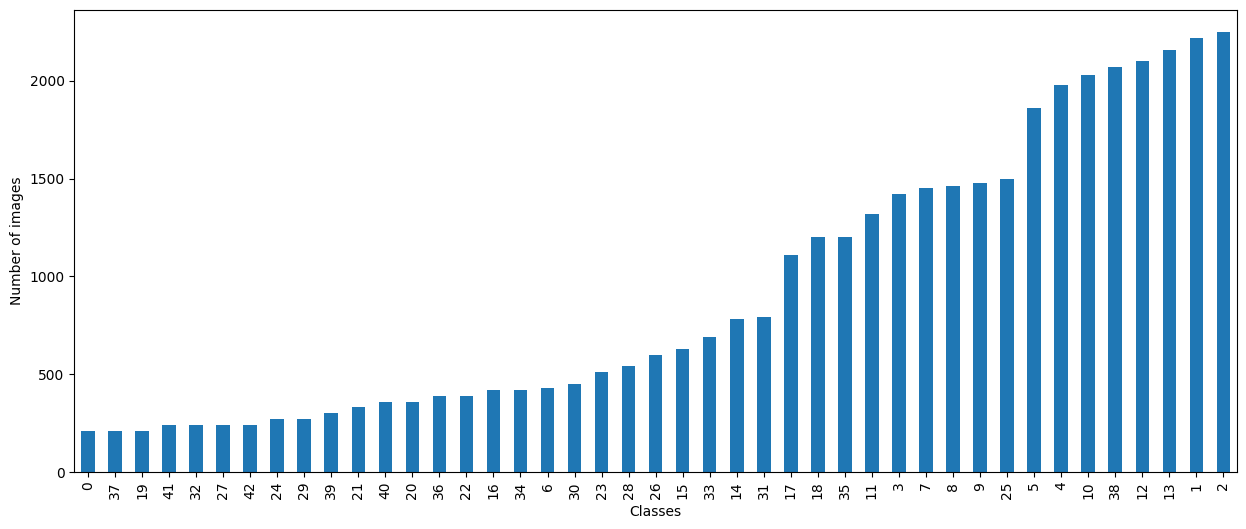

In [ ]:
data_dic = {}

for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df = pd.Series(data_dic)

plt.figure(figsize=(15, 6))
data_df.sort_values().plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')


# **2. Building Model**

In [ ]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
import keras # High-level neural networks API.
import tensorflow as tf # Open-source machine learning library developed by the TensorFlow team.
from tensorflow import keras
from keras.models import Sequential # Sequential is a linear stack of layers.
from tensorflow.keras.layers import Input, Dense # Input and Dense layers from TensorFlow.
from keras import models # Additional models module from Keras.

In [ ]:
# Install the visualkeras package using pip.
!pip install visualkeras

# Import the visualkeras library.
import visualkeras  # A library for visualizing Keras neural network models.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.3 MB/s eta 0:00:00


# **3. Training Model**


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20

history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

model.save('my_model.h5')

Epoch 1/20
492/492 [==============================] - 119s 232ms/step - loss: 2.3690 - accuracy: 0.4108 - val_loss: 0.6545 - val_accuracy: 0.8516
Epoch 2/20
492/492 [==============================] - 106s 216ms/step - loss: 0.7494 - accuracy: 0.7777 - val_loss: 0.1991 - val_accuracy: 0.9491
Epoch 3/20
492/492 [==============================] - 108s 220ms/step - loss: 0.4493 - accuracy: 0.8654 - val_loss: 0.1083 - val_accuracy: 0.9722
Epoch 4/20
492/492 [==============================] - 106s 215ms/step - loss: 0.3162 - accuracy: 0.9097 - val_loss: 0.1022 - val_accuracy: 0.9734
Epoch 5/20
492/492 [==============================] - 110s 225ms/step - loss: 0.2624 - accuracy: 0.9251 - val_loss: 0.0818 - val_accuracy: 0.9799
Epoch 6/20
492/492 [==============================] - 111s 226ms/step - loss: 0.2239 - accuracy: 0.9358 - val_loss: 0.0672 - val_accuracy: 0.9840
Epoch 7/20
492/492 [==============================] - 108s 219ms/step - loss: 0.1887 - accuracy: 0.9457 - val_loss: 0.0488 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


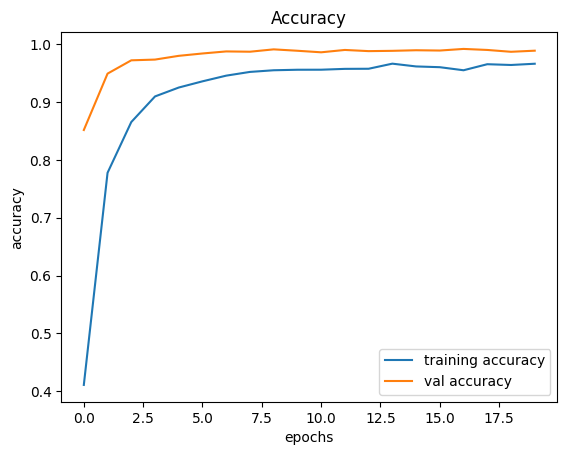

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')

plt.plot(history.history['val_accuracy'], label='val accuracy')

plt.title('Accuracy')

plt.xlabel('epochs')

plt.ylabel('accuracy')

plt.legend()

plt.show()

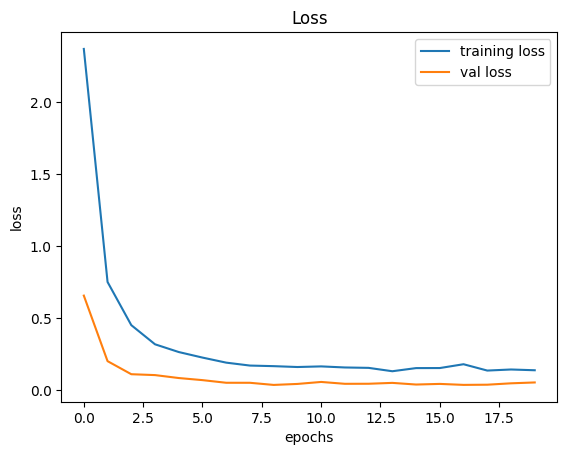

In [ ]:
plt.plot(history.history['loss'], label='training loss')

plt.plot(history.history['val_loss'], label='val loss')

plt.title('Loss')

plt.xlabel('epochs')

plt.ylabel('loss')

plt.legend()

plt.show()

# **4. Testing Model**


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test Loss', score[0])

print('Test accuracy', score[1])

Test Loss 0.051052939146757126
Test accuracy 0.9888126254081726


In [ ]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)

y_pred_class = np.argmax(y_pred, axis=1)

246/246 [==============================] - 6s 25ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_pred_class, y_test_class)
precision = precision_score(y_pred_class, y_test_class, average='macro')
recall = recall_score(y_pred_class, y_test_class, average='macro')
f1 = f1_score(y_pred_class, y_test_class, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9888126112382405
Precision: 0.9867745319974113
Recall: 0.9891505315973929
F1-score: 0.9878468842052026


# **5. Implementation**

In [ ]:
import os
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI/traffic_classifier.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

In [ ]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)

    # Get the index of the maximum probability from the prediction
    pred_index = np.argmax(Y_pred)

    # Get the predicted class name using the classes dictionary
    predicted_class = classes[pred_index]

    return image, predicted_class

1/1 [==============================] - 0s 169ms/step
Predicted traffic sign is:  Speed limit (50km/h)


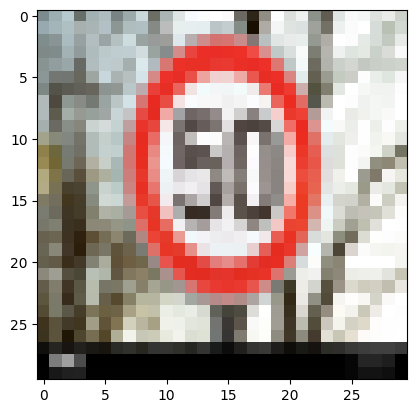

In [ ]:
plot, prediction = test_on_img(r'/content/drive/MyDrive/AI/he.jpg')
print("Predicted traffic sign is: ", prediction)
plt.imshow(plot)
plt.show()